In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [2]:
from collections import Counter

In [3]:
from keras import Sequential
from keras.layers import Dense

In [4]:
#reading the dataframe
df = pd.read_csv('../csv_files/bankloan.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#check if there is any null values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#drop the whole unwanted row
df = df.dropna()
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
df = df.drop('Loan_ID', axis=1)

In [8]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [9]:
df['LoanAmount'] = (df['LoanAmount']*1000).astype(int)

In [10]:
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [11]:
pre_X = df.drop('Loan_Status', axis = 1)
pre_y = df['Loan_Status']

In [12]:
dummy_X = pd.get_dummies(pre_X)
dummy_y = pre_y.map(dict(Y=1, N=0))

In [13]:
smote = SMOTE(sampling_strategy= 'minority')
X1, y = smote.fit_sample(dummy_X,dummy_y)
scaler = MinMaxScaler()
X = scaler.fit_transform(X1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle = True)

In [15]:
model = Sequential()
model.add(Dense(200, activation = 'relu', kernel_initializer = 'random_normal', input_dim = X_test.shape[1]))
model.add(Dense(400, activation = 'relu', kernel_initializer = 'random_normal'))
model.add(Dense(4, activation = 'relu', kernel_initializer = 'random_normal'))
model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'random_normal'))

In [16]:
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
model.fit(X_train, y_train, batch_size = 20, epochs = 50, verbose = 2)

Epoch 1/50
25/25 - 0s - loss: 0.6932 - accuracy: 0.5321
Epoch 2/50
25/25 - 0s - loss: 0.6910 - accuracy: 0.6747
Epoch 3/50
25/25 - 0s - loss: 0.6712 - accuracy: 0.6687
Epoch 4/50
25/25 - 0s - loss: 0.5922 - accuracy: 0.7329
Epoch 5/50
25/25 - 0s - loss: 0.5115 - accuracy: 0.8213
Epoch 6/50
25/25 - 0s - loss: 0.4785 - accuracy: 0.8474
Epoch 7/50
25/25 - 0s - loss: 0.4682 - accuracy: 0.8394
Epoch 8/50
25/25 - 0s - loss: 0.4563 - accuracy: 0.8675
Epoch 9/50
25/25 - 0s - loss: 0.4475 - accuracy: 0.8494
Epoch 10/50
25/25 - 0s - loss: 0.4431 - accuracy: 0.8614
Epoch 11/50
25/25 - 0s - loss: 0.4424 - accuracy: 0.8514
Epoch 12/50
25/25 - 0s - loss: 0.4285 - accuracy: 0.8655
Epoch 13/50
25/25 - 0s - loss: 0.4238 - accuracy: 0.8594
Epoch 14/50
25/25 - 0s - loss: 0.4214 - accuracy: 0.8614
Epoch 15/50
25/25 - 0s - loss: 0.4202 - accuracy: 0.8635
Epoch 16/50
25/25 - 0s - loss: 0.4196 - accuracy: 0.8614
Epoch 17/50
25/25 - 0s - loss: 0.4071 - accuracy: 0.8675
Epoch 18/50
25/25 - 0s - loss: 0.4063 - 

In [18]:
eval_model = model.evaluate(X_train, y_train)
eval_model

16/16 [==============================] - 0s 780us/step - loss: 0.3492 - accuracy: 0.8655


[0.349185049533844, 0.8654618263244629]

In [19]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.59)

In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[61, 23],
       [ 3, 79]])

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

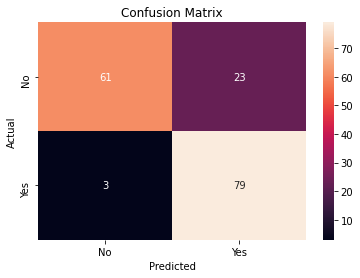

In [21]:
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])

In [32]:
#pickle the model to be used in django
model.save('../pickles/load_model.h5')

In [33]:
#To use the model
#new_model = tf.keras.models.load_model('new_model.h5')